**GROUP PROJECT PROPOSAL**


# **Predicting Heart Disease Using DATA SCIENCE**
#### ARYAN JAIN, KATIE LIANG, MADILYN PORTAS, VIBHAV

## Introduction

**Heart disease** is a leading cause of death globally. Early detection can lead to effective treatment and management, potentially reducing the mortality rate. Our project aims to answer the question: “Can we predict the presence of heart disease based on health parameters?”

We will use the Heart Disease dataset from the UCI Machine Learning Repository. This dataset contains 76 attributes, including age, sex, chest pain type, resting blood pressure, cholesterol levels, fasting blood sugar, and others. Missing values can also be find in this dataset as well.

In [3]:
#Importing Libraries
library(tidyverse)
library(tidymodels)
library(repr)
library(RColorBrewer)
library(dplyr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

In [27]:
#reading the data
column_names <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")
heart_data <- read_csv("data/processed.hungarian.data", col_names = column_names)

#cleaning and wrangling data
heart_data[ heart_data == "?"] <- NA

heart_clean <- heart_data |>
               mutate(diag = ifelse(is.na(num), NA, (num > 0))) |>
               mutate(trestbps = as.factor(as.integer(trestbps)),
                      chol = as.factor(as.integer(chol)), 
                      fbs = as.factor(as.integer(fbs)),
                      thalach = as.factor(as.integer(thalach)),
                      exang = as.factor(as.integer(exang)),
                      slope = as.factor(as.integer(slope)),
                      ca = as.factor(as.integer(ca)),
                      thal = as.factor(as.integer(thal)))

#spliting the data
heart_split <- initial_split(heart_clean, prop = 0.75, strata = num)
heart_training <- training(heart_split)
heart_testing <- testing(heart_split)

Rows: 294 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): trestbps, chol, fbs, restecg, thalach, exang, slope, ca, thal
dbl (5): age, sex, cp, oldpeak, num

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [32]:
heart_summary <- heart_training |>
                 group_by(diag) |>
                 summarize(min_age = min(age), max_age = max(age), mean_age = mean(age),
                           min_trestbps = min(trestbps), max_trestbps = (trestbps), mean_trestbps(trestbps), 
                           min_thalach = (thalach), max_thalach = (thalach), mean_thalach(thalach),
                           n_of_patients = n())

ERROR: [1m[33mError[39m in `summarize()`:[22m
[1m[22m[36mℹ[39m In argument: `min_trestbps = min(trestbps)`.
[36mℹ[39m In group 1: `diag = FALSE`.
[1mCaused by error in `Summary.factor()`:[22m
[33m![39m ‘min’ not meaningful for factors


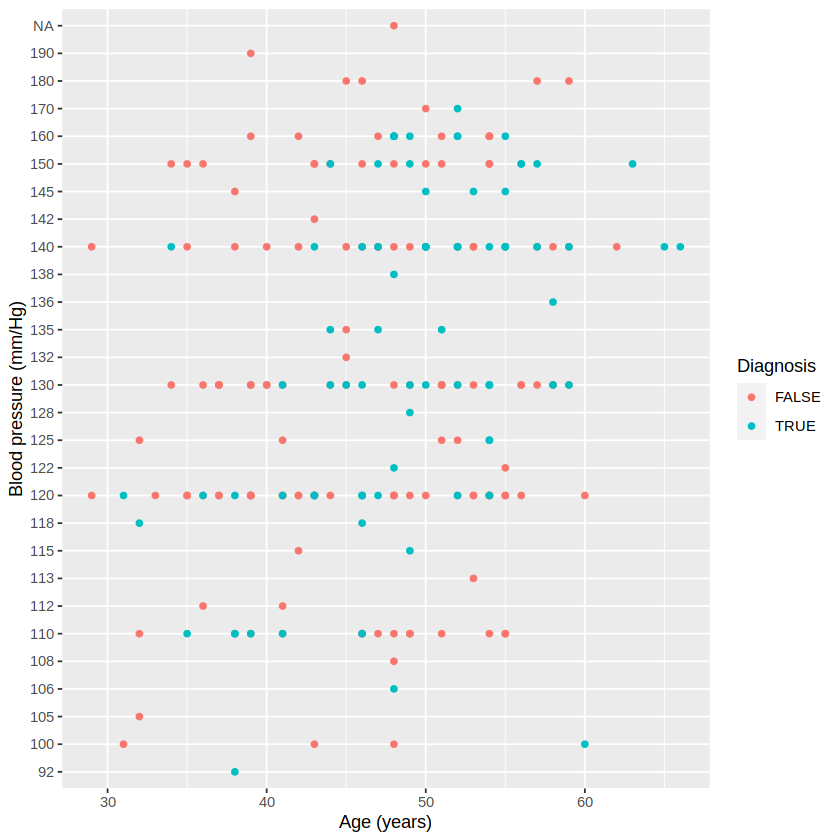

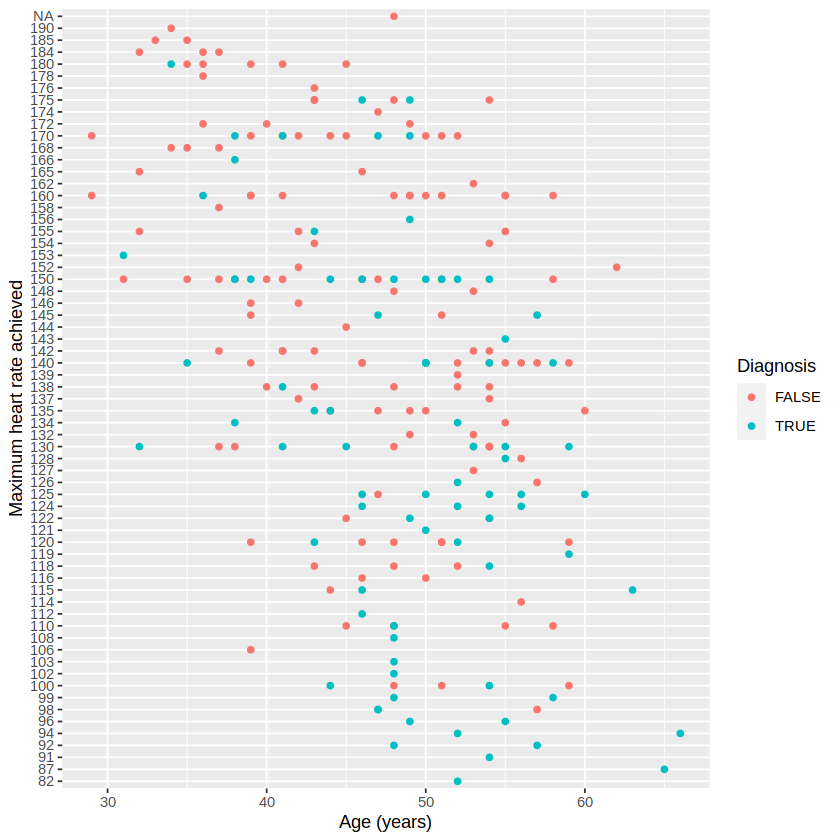

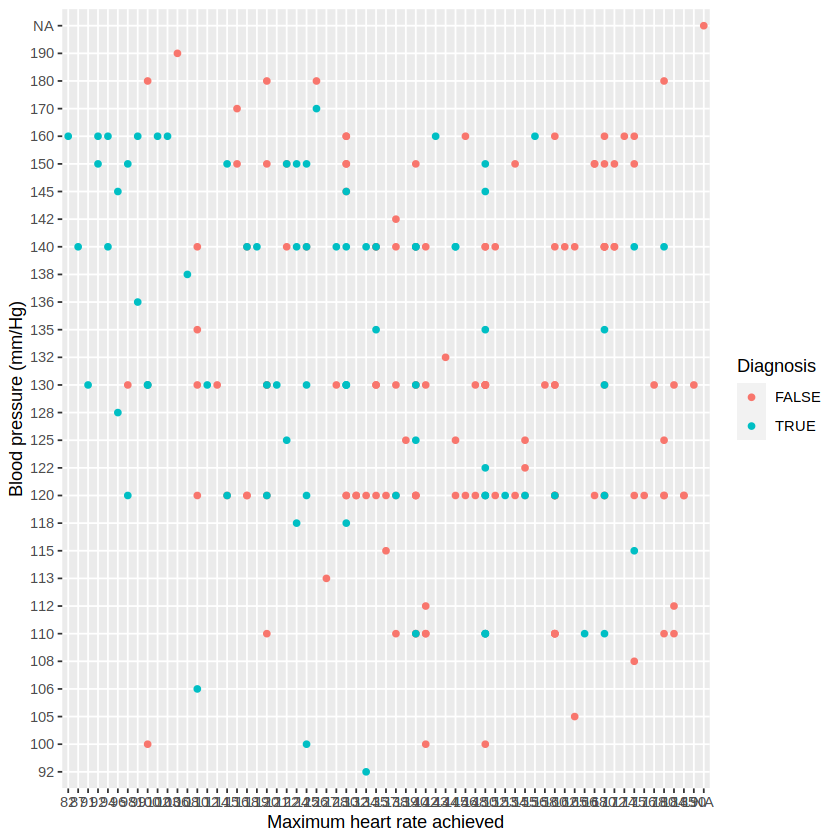

In [31]:
#plotting the training data
plot_1 <- ggplot(heart_training, aes(x = age, y = trestbps, color = diag)) +
          geom_point() +
          labs (x = "Age (years)", y = "Blood pressure (mm/Hg)", color = "Diagnosis")
plot_1

plot_2 <- ggplot(heart_training, aes(x = age, y = thalach, color = diag)) +
          geom_point() +
          labs (x = "Age (years)", y = "Maximum heart rate achieved", color = "Diagnosis")
plot_2

plot_3 <- ggplot(heart_training, aes(x = thalach , y = trestbps, color = diag)) +
          geom_point() +
          labs (x = "Maximum heart rate achieved", y = "Blood pressure (mm/Hg)", color = "Diagnosis")
plot_3